In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
df=pd.read_csv("outputd0315.csv")
print(df)
df.describe()
f=df
f['Date'] = pd.to_datetime(f['Date'])

f.drop(columns=['Class'],inplace=True)
f.drop(columns=['Time'],inplace=True)
f.drop(columns=['timestamp'],inplace=True)
f.drop(columns=['Date'],inplace=True)
df.corr()


           Date      Time  average insect count   Class  \
0    2023-04-27  18:30:00              4.571429  OSMACO   
1    2023-04-27  18:40:00              4.009615  OSMACO   
2    2023-04-27  18:50:00              2.469526  OSMACO   
3    2023-04-27  19:00:00              2.574742  OSMACO   
4    2023-04-27  19:10:00              3.038168  OSMACO   
..          ...       ...                   ...     ...   
608  2023-06-01  15:00:00              0.901961  OSMACO   
609  2023-06-01  15:10:00              0.759259  OSMACO   
610  2023-06-01  15:20:00              0.125000  OSMACO   
611  2023-06-01  12:50:00              0.960265  OSMACO   
612  2023-06-01  10:20:00              0.732673  OSMACO   

     Dew Point, *C, WEASN17 Osmia 2023  Gust Speed, m/s, WEASN17 Osmia 2023  \
0                                8.667                                 0.00   
1                                8.208                                 0.00   
2                                7.781                

,average insect count,"Dew Point, *C, WEASN17 Osmia 2023","Gust Speed, m/s, WEASN17 Osmia 2023","RH, %, WEASN17 Osmia 2023 Air humidity","Temperature, *C, WEASN17 Osmia 2023 AIr temperature","Rain, mm, WEASN17 Osmia 2023 Precipitation","Solar Radiation, W/m^2, WEASN17 Osmia 2023 Radiation","Wind Speed, m/s, WEASN17 Osmia 2023 Wind speed"
average insect count,1.000000,0.273584,-0.117779,0.162738,0.023882,0.033121,0.030300,-0.153493
"Dew Point, *C, WEASN17 Osmia 2023",0.273584,1.000000,-0.270376,0.138223,0.548819,0.071411,-0.009780,-0.157249
"Gust Speed, m/s, WEASN17 Osmia 2023",-0.117779,-0.270376,1.000000,-0.577496,0.293775,0.180997,0.591369,0.843951
"RH, %, WEASN17 Osmia 2023 Air humidity",0.162738,0.138223,-0.577496,1.000000,-0.743388,0.131546,-0.771444,-0.411803
"Temperature, *C, WEASN17 Osmia 2023 AIr temperature",0.023882,0.548819,0.293775,-0.743388,1.000000,-0.060342,0.641815,0.245916
"Rain, mm, WEASN17 Osmia 2023 Precipitation",0.033121,0.071411,0.180997,0.131546,-0.060342,1.000000,-0.139865,0.265943
"Solar Radiation, W/m^2, WEASN17 Osmia 2023 Radiation",0.030300,-0.009780,0.591369,-0.771444,0.641815,-0.139865,1.000000,0.453619
"Wind Speed, m/s, WEASN17 Osmia 2023 Wind speed",-0.153493,-0.157249,0.843951,-0.411803,0.245916,0.265943,0.453619,1.000000


In [73]:
X=df.iloc[:,4:11] #environmental features attributes
X.drop(columns=['Rain, mm, WEASN17 Osmia 2023 Precipitation'], inplace=True) 

y=df.iloc[:, 2].values   #average insect count

C:\Users\JRF_Awadh\AppData\Local\Temp\ipykernel_27128\1864125406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Rain, mm, WEASN17 Osmia 2023 Precipitation'], inplace=True)


In [74]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()


In [75]:
#split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [76]:
#Train the Algorithm
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf=svr_rbf.fit(X_train,y_train).predict(X_test)
svr_lin=SVR(kernel='linear')
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
svr_poly =SVR(kernel='poly',C=1e3, degree=2)
y_poly =svr_poly.fit(X_train, y_train).predict(X_test)


In [77]:
#creating and fitting the SVR model
ll_svr=SVR().fit(X_train,y_train)
print("The r_square value is: ",ll_svr.score(X_train,y_train))

The r_square value is:  0.2883801289133623


In [54]:
#Training Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [55]:

y_pred=ll_svr.predict(X_train)
print('the r_square value is', r2_score(y_train,y_pred))

the r_square value is 0.2883801289133623


In [56]:
print("The MAE is ", mean_absolute_error(y_train,y_pred))

The MAE is  0.3793788862046513


In [57]:
print("The MSE is", mean_squared_error(y_train,y_pred))

The MSE is 0.2851866351927545


In [58]:
import numpy as np
print("The RMSE is",np.sqrt(mean_squared_error(y_train,y_pred)))

The RMSE is 0.5340286838670321


In [59]:
print("The EVS is",explained_variance_score(y_train,y_pred))

The EVS is 0.3139246020783474


In [60]:
#Prediction on testing data
y_pred=ll_svr.predict(X_test)
print("The testing r square is: ", r2_score(y_test,y_pred))


The testing r square is:  0.42476997734523403


In [63]:
print("the testing r square is: ",ll_svr.score(X_test,y_test))

the testing r square is:  0.42476997734523403


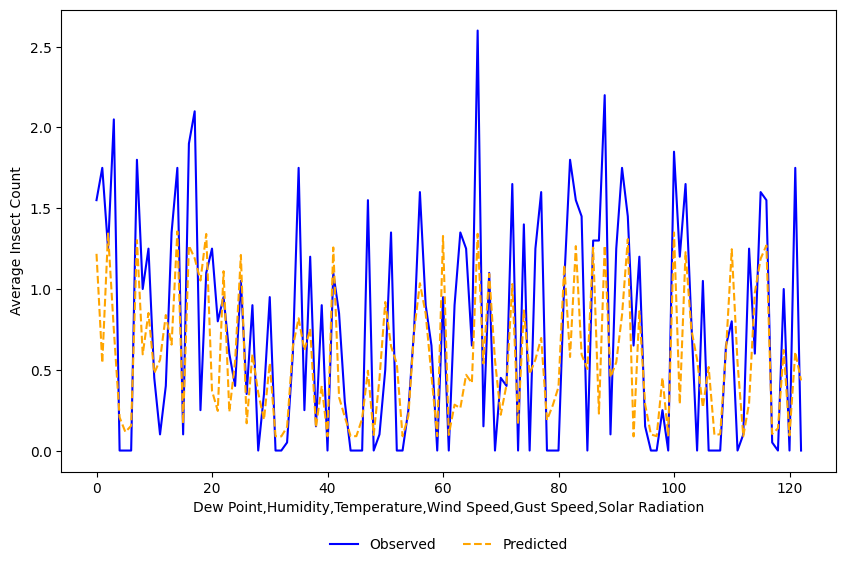

In [64]:
#Plotting the observed and predicted average insect count
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))
plt.plot(x_ax,y_test, label = 'Observed', color='blue',linestyle='-')
plt.plot(x_ax,y_pred,label ="Predicted", color='orange',linestyle='--')
plt.ylabel('Average Insect Count')
plt.xlabel('Dew Point,Humidity,Temperature,Wind Speed,Gust Speed,Solar Radiation')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


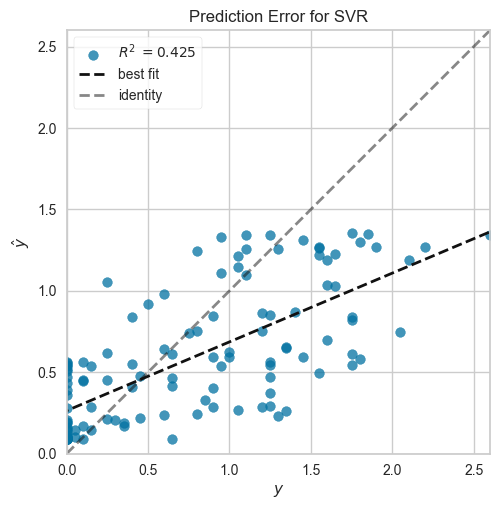

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [66]:
from yellowbrick.regressor import PredictionError

visualizer=PredictionError(ll_svr)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()


c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


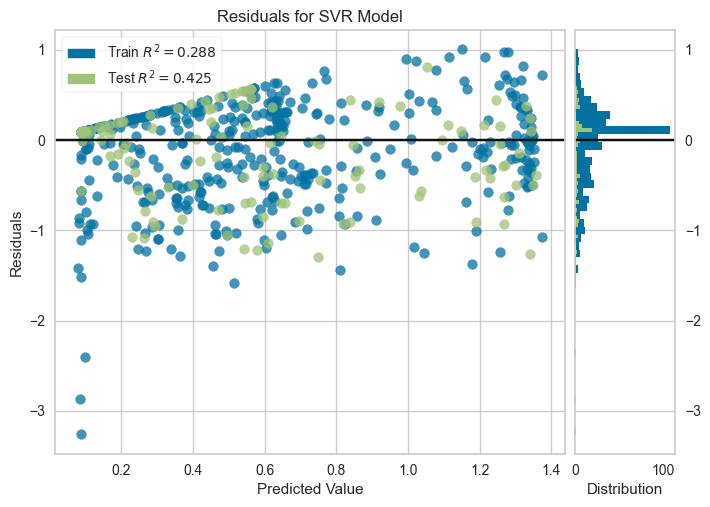

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
#Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualiser = ResidualsPlot(ll_svr)
visualiser.fit(X_train,y_train)
visualiser.score(X_test,y_test)
visualiser.poof()

In [70]:
import numpy as np
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
print("THE MAE IS : ",mae)
#RMSE & R2
mse =metrics.mean_squared_error(y_test,y_pred)
print("THE MSE IS : ",mse)
rmse=np.sqrt(mse)
print("RMSE =",rmse)
r2=metrics.r2_score(y_test,y_pred)
print("R square: ",r2)

THE MAE IS :  0.39680238250656
THE MSE IS :  0.26436760458525266
RMSE = 0.51416690343239
R square:  0.42476997734523403


In [95]:
'''
plt.scatter(X_test, y_test, color ='darkorange',label='data')
plt.plot(X_test, y_lin,color='c',label='Linear model')
plt.plot(X_test,y_poly,color='cornflowerblue',label='Polynomial model')
plt.x_label('data')
plt.y_label('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
'''
import numpy as np

X_test = np.ravel(X_test)
X_test = X_test[:123]
print(X_test.shape)


(123,)


In [102]:
mae=metrics.mean_absolute_error(y_test,y_rbf)
print("THE MAE IS : ",mae)
#RMSE & R2
mse =metrics.mean_squared_error(y_test,y_rbf)
print("THE MSE IS : ",mse)
rmse=np.sqrt(mse)
print("RMSE =",rmse)
r2=metrics.r2_score(y_test,y_rbf)
print("R square: ",r2)


THE MAE IS :  0.47026331361172297
THE MSE IS :  0.4279634675494203
RMSE = 0.6541891680159648
R square:  0.06880634819052311
